In [116]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)

In [2]:
data = df = pd.read_csv('housing_prices.csv')

In [117]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

## Find the percentage of Null features

In [51]:
features_with_na=[features for features in data.columns if data[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round((data[feature].isnull().mean())*100, 3), ' % null values')

LotFrontage 17.74  % null values
Alley 93.767  % null values
MasVnrType 0.548  % null values
MasVnrArea 0.548  % null values
BsmtQual 2.534  % null values
BsmtCond 2.534  % null values
BsmtExposure 2.603  % null values
BsmtFinType1 2.534  % null values
BsmtFinType2 2.603  % null values
FireplaceQu 47.26  % null values
GarageType 5.548  % null values
GarageYrBlt 5.548  % null values
GarageFinish 5.548  % null values
GarageQual 5.548  % null values
GarageCond 5.548  % null values
PoolQC 99.521  % null values
Fence 80.753  % null values
MiscFeature 96.301  % null values


## Relation between null values and sales price

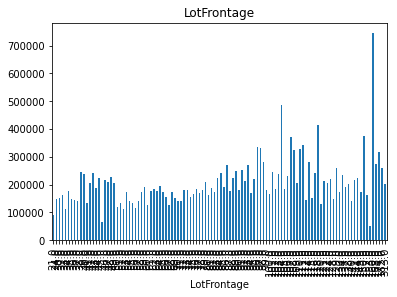

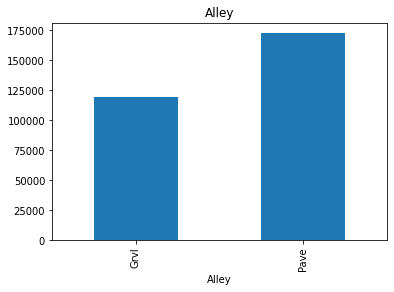

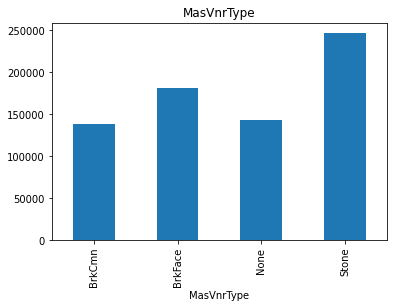

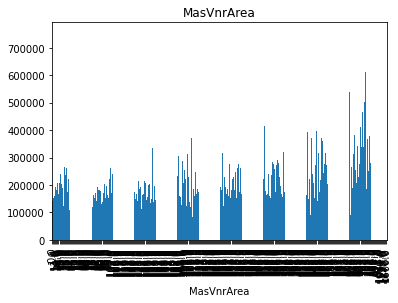

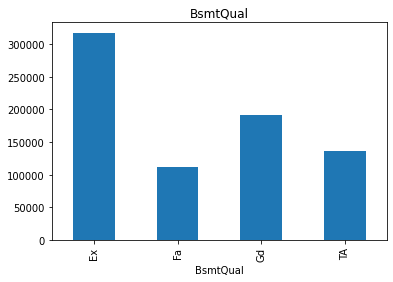

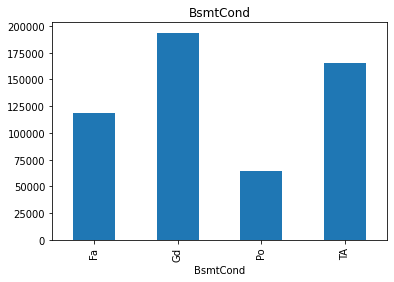

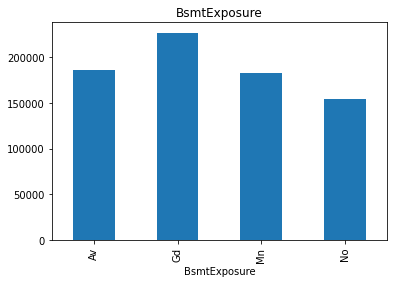

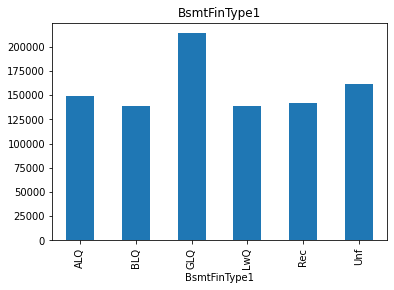

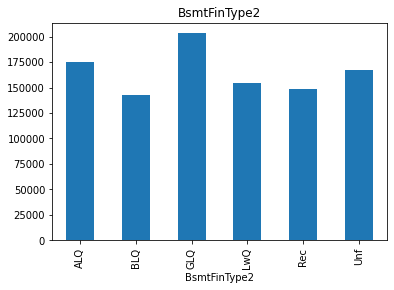

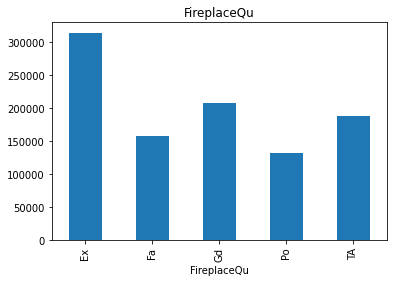

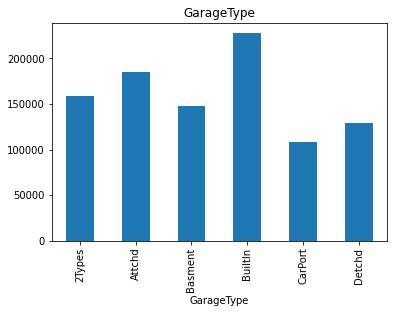

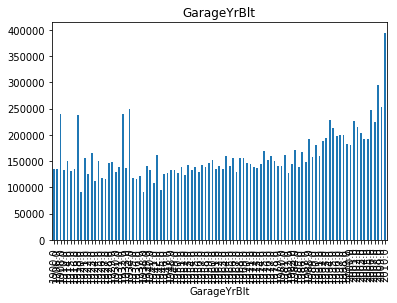

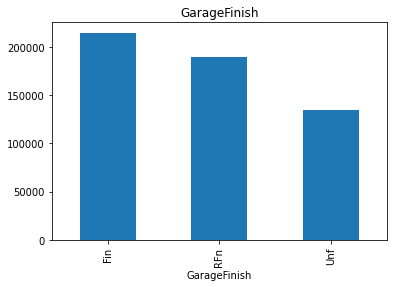

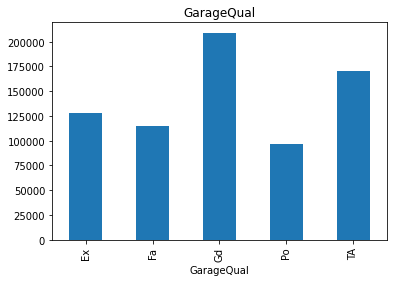

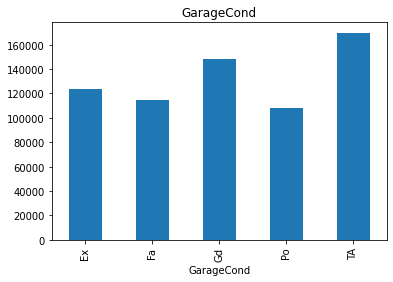

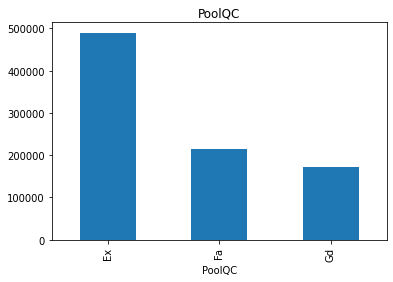

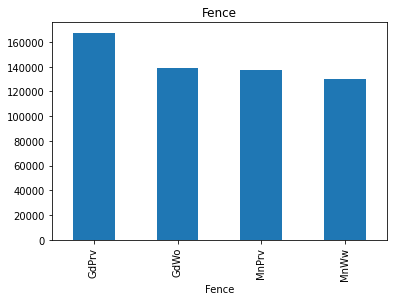

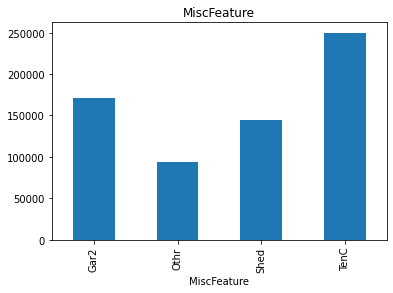

In [115]:

for feature in features_with_na:
    data_set = data.copy()
    
    
    data_set[feature] = np.where(data_set[feature].isnull(), 1, 0)
    
    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

## Finding Numerical Variables

In [60]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
data[numerical_features].sample()


Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
888,889,20,95.0,15865,8,6,1970,1970,0.0,351,...,81,207,0,0,224,0,0,10,2007,268000


## Finding year columns

In [63]:
year_columns = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
year_columns

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Finding relation between year variables and sales price

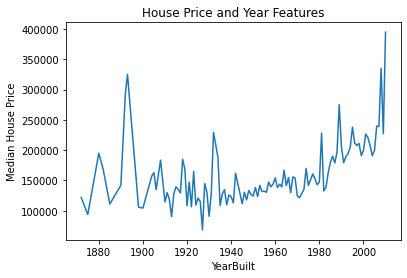

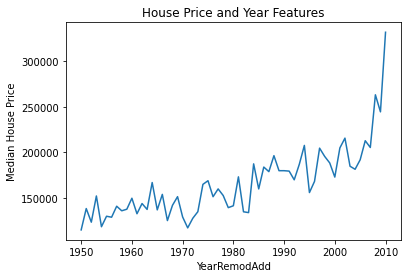

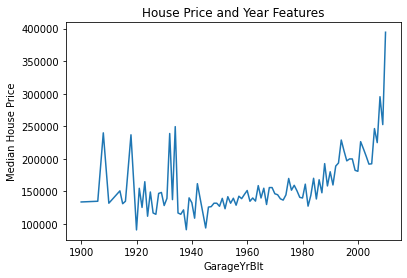

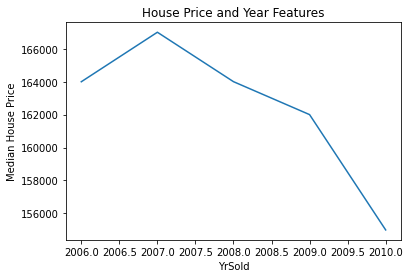

In [91]:
for feature in year_columns:
    data_set = data.copy()
    data_set.groupby(feature)['SalePrice'].median().plot()
    plt.xlabel(feature)
    plt.ylabel('Median House Price')
    plt.title('House Price and Year Features')
    plt.show()

## Discrete  features from numerical features

In [100]:
discrete_features = [feature for feature in numerical_features if len(data[feature].unique())<25 and feature not in year_columns+ ['Id']]
print('Total discrete features:  ', len(discrete_features))

Total discrete features:   17


In [95]:
data[discrete_features].sample()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
89,20,4,5,0,1,0,1,0,3,1,5,0,0,0,0,0,8


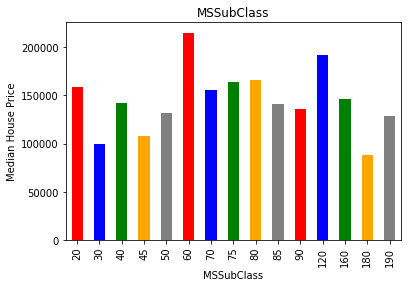

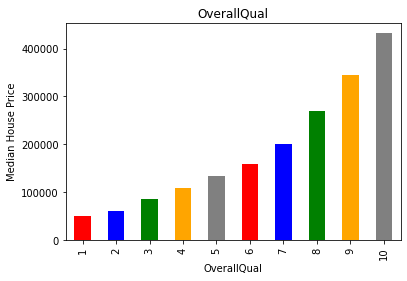

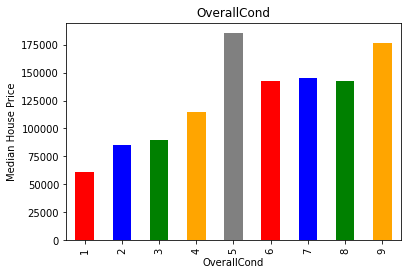

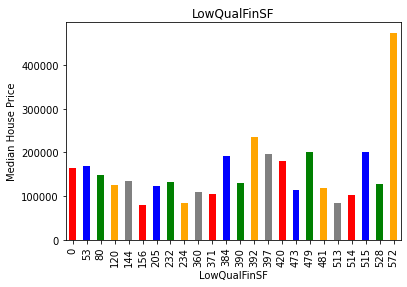

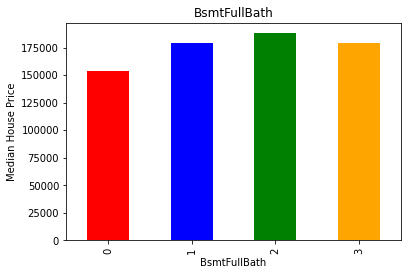

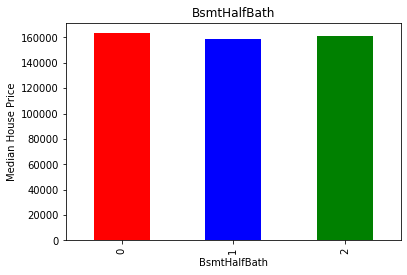

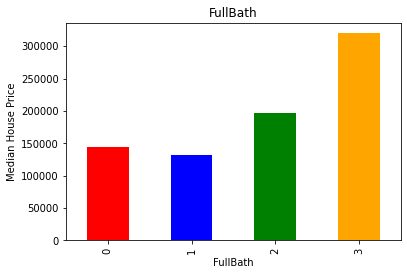

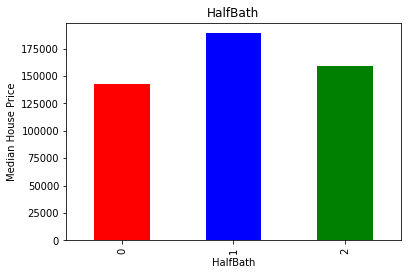

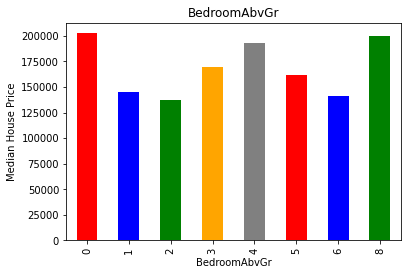

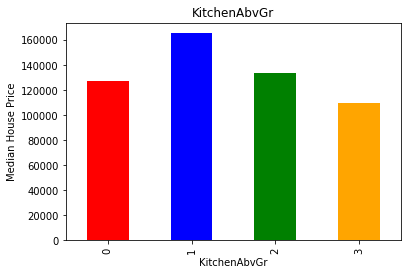

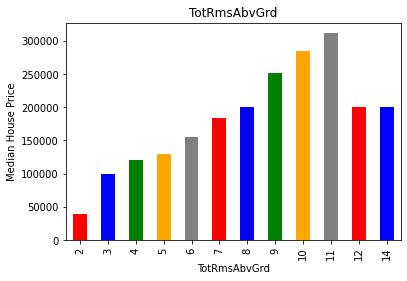

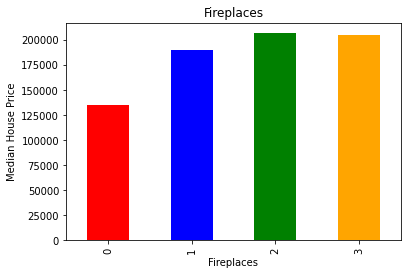

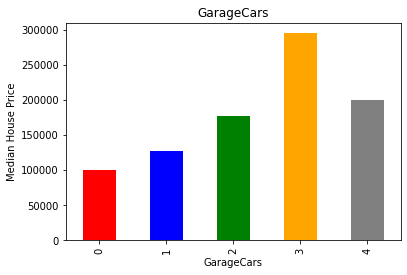

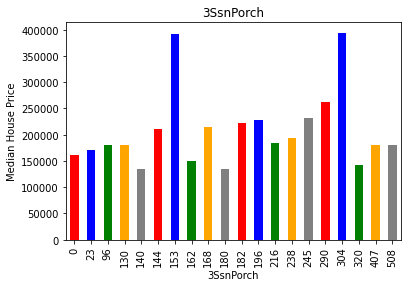

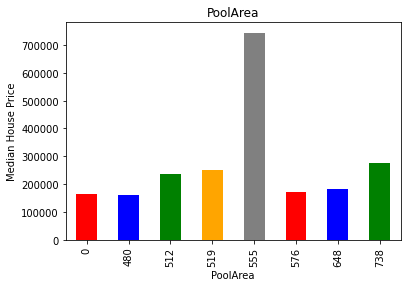

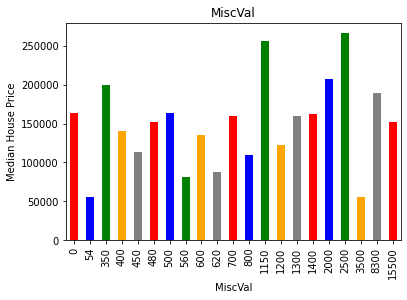

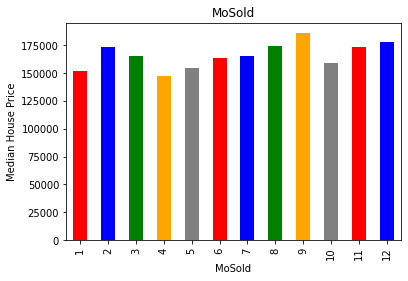

In [101]:
for feature in discrete_features:
    data_set = data.copy()
    data_set.groupby(feature)['SalePrice'].median().plot.bar(color=('red', 'blue', 'green', 'orange', 'grey'))
    plt.xlabel(feature)
    plt.ylabel('Median House Price')
    plt.title(feature)
    plt.show()

## Continuous Features

In [109]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features +  year_columns + ['Id']]
print('Number of continuous features: ', len(continuous_features))

Number of continuous features:  16


In [110]:
data[continuous_features].sample()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
95,NaN,9765,68.0,310,0,370,680,680,790,1470,420,232,63,0,0,185000


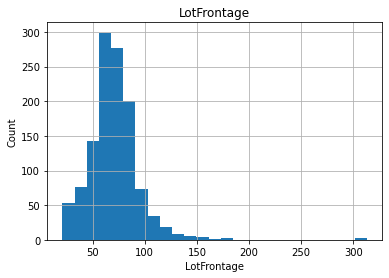

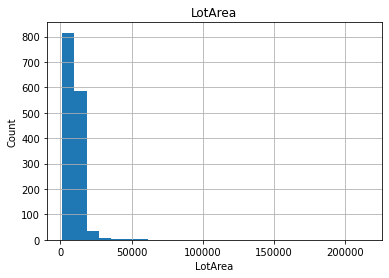

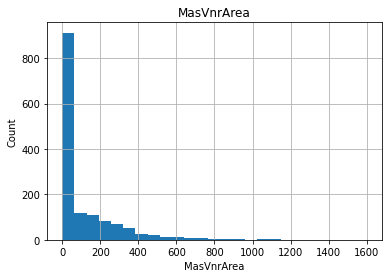

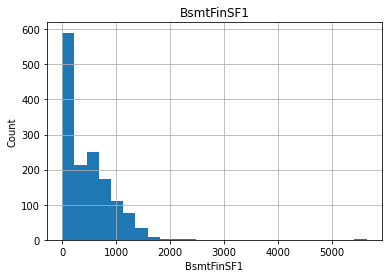

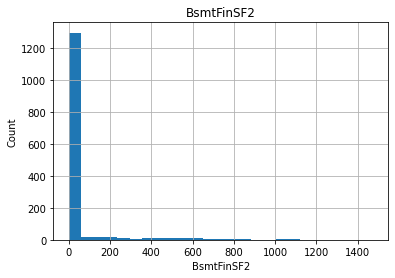

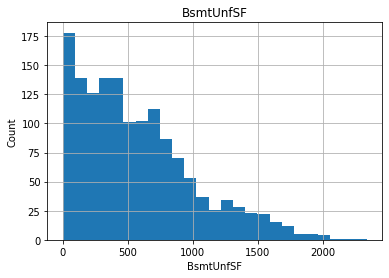

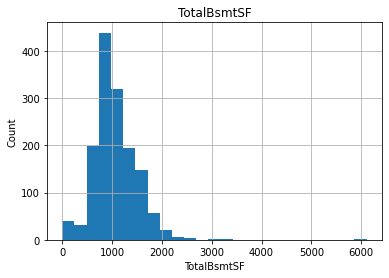

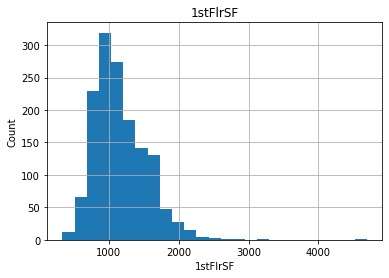

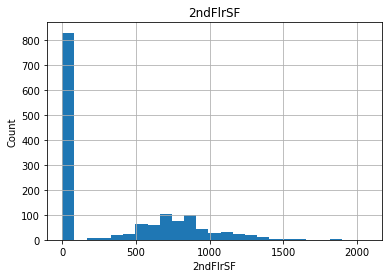

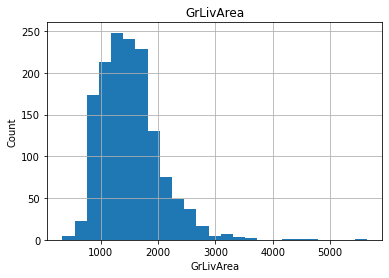

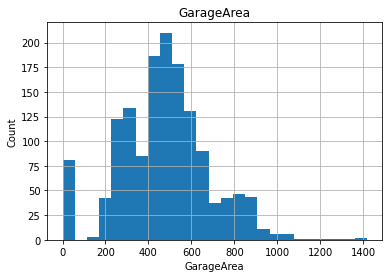

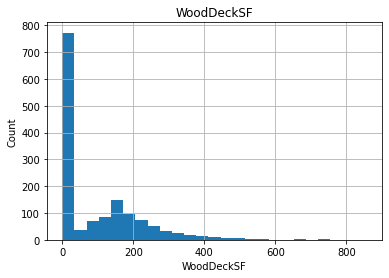

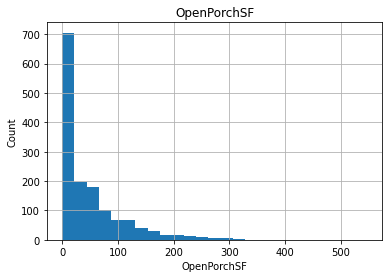

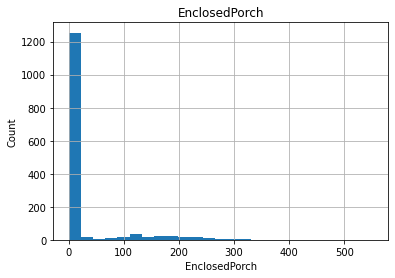

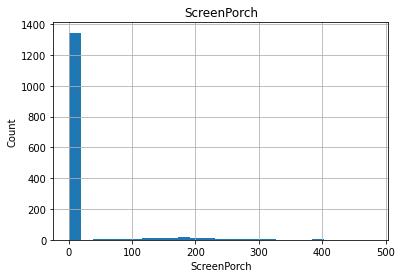

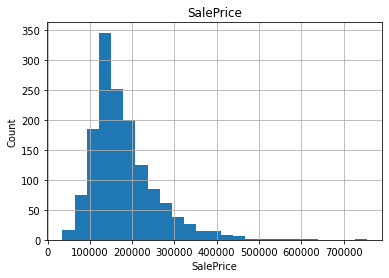

In [113]:
for feature in continuous_features:
    data_set = data.copy()
    data_set[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

## Feature Engineering

In [118]:
X_train, X_test, y_train, y_test = train_test_split(data, data['SalePrice'], test_size=0.1, random_state=123)

In [120]:
X_train.shape, y_train.shape

((1314, 81), (1314,))

Null catgorical features

In [133]:
features_with_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes=='O']
for feature in features_with_nan:
    print(feature,'      : ', np.round((data[feature].isnull().mean())*100, 3), ' % null values')

Alley       :  93.767  % null values
MasVnrType       :  0.548  % null values
BsmtQual       :  2.534  % null values
BsmtCond       :  2.534  % null values
BsmtExposure       :  2.603  % null values
BsmtFinType1       :  2.534  % null values
BsmtFinType2       :  2.603  % null values
FireplaceQu       :  47.26  % null values
GarageType       :  5.548  % null values
GarageFinish       :  5.548  % null values
GarageQual       :  5.548  % null values
GarageCond       :  5.548  % null values
PoolQC       :  99.521  % null values
Fence       :  80.753  % null values
MiscFeature       :  96.301  % null values


A function to fill the null values

In [134]:
def replace_cat(data, features_with_nan):
    dataset = data.copy()
    dataset[features_with_nan] = dataset[features_with_nan].fillna('N_A')
    return dataset
data = replace_cat(data, features_with_nan)

In [136]:
data[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

Null numerical features

In [138]:
numericals_with_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes != 'O']
for feature in numericals_with_nan:
    print(feature,'      : ', np.round((data[feature].isnull().mean())*100, 3), ' % null values')

LotFrontage       :  17.74  % null values
MasVnrArea       :  0.548  % null values
GarageYrBlt       :  5.548  % null values


Replacing Null values

In [151]:
for feature in numericals_with_nan:
    median = data[feature].median()
    
    data[feature + 'nan'] = np.where(data[feature].isnull(), 1, 0)
    data[feature].fillna(median, inplace = True)
    

In [152]:
data[numericals_with_nan].isna().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [153]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,60,RL,65.0,8450,Pave,N_A,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,N_A,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,N_A,N_A,N_A,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,N_A,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,N_A,N_A,N_A,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,N_A,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,N_A,N_A,N_A,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,N_A,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,N_A,N_A,N_A,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,N_A,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,N_A,N_A,N_A,0,12,2008,WD,Normal,250000,0,0,0


In [64]:
X = data.drop(columns=['Id',
                       'YearBuilt',
                       'YearRemodAdd',
                       'GarageYrBlt',
                       'YrSold',
                       'PoolQC', # has 1453 missing values
                       'PoolArea', # has 1453 instances of 0 
                       'ScreenPorch',
                       'Street',
                       '3SsnPorch',
                       'MiscVal',
                       'LowQualFinSF',
                       'Alley',
                       'MiscFeature',
                       'KitchenAbvGr',
                       'Fence' # has 1179 missing values
                      ]
             )
y = X.pop("SalePrice")

In [65]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,548,TA,TA,Y,0,61,0,2,WD,Normal
1,20,RL,80.0,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,460,TA,TA,Y,298,0,0,5,WD,Normal
2,60,RL,68.0,11250,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,608,TA,TA,Y,0,42,0,9,WD,Normal
3,70,RL,60.0,9550,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,642,TA,TA,Y,0,35,272,2,WD,Abnorml
4,60,RL,84.0,14260,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,836,TA,TA,Y,192,84,0,12,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,460,TA,TA,Y,0,40,0,8,WD,Normal
1456,20,RL,85.0,13175,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,500,TA,TA,Y,349,0,0,2,WD,Normal
1457,70,RL,66.0,9042,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,252,TA,TA,Y,0,60,0,5,WD,Normal
1458,20,RL,68.0,9717,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,240,TA,TA,Y,366,0,112,4,WD,Normal


In [66]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [8]:
X_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold',
     

In [68]:
one_hot_columns = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley(drop)', 'LotShape', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType','HouseStyle','YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces', 'GarageType',  'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']   

In [69]:
ordinal_columns = ['LotShape', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu',  'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive']

In [70]:
X_cat = X.select_dtypes(exclude="number").copy()
X_num = X.select_dtypes(include="number").copy()


In [71]:
numeric_pipe = make_pipeline(SimpleImputer(strategy="mean"))

In [72]:
ordinal_cols = X_cat.columns.get_indexer([
    'LotShape',
    'LandSlope',
    'ExterQual',
    'ExterCond',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'HeatingQC',
    'KitchenQual',
    'Functional',
    'FireplaceQu',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PavedDrive'
])

In [73]:
onehot_cols = X_cat.columns.get_indexer([
    'MSSubClass',
    'MSZoning',
    'LotFrontage',
    'LotArea',
    'Alley(drop)',
    'LotShape',
    'Utilities',
    'LotConfig',
    'Neighborhood',
    'Condition1',
    'Condition2',
    'BldgType',
    'HouseStyle',
    'YearBuilt',
    'YearRemodAdd',
    'RoofStyle',
    'RoofMatl',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'MasVnrArea',
    'Foundation',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    'Heating',
    'CentralAir',
    'Electrical',
    '1stFlrSF',
    '2ndFlrSF',
    'GrLivArea',
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath',
    'BedroomAbvGr',
    'KitchenAbvGr',
    'TotRmsAbvGrd',
    'Fireplaces',
    'GarageType',
    'GarageYrBlt',
    'GarageCars',
    'GarageArea',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    'MoSold',
    'YrSold',
    'SaleType',
    'SaleCondition'
])   

In [74]:
Lot_shape_cond = ['Reg', 'IR1', 'IR2', 'IR3', 'N_A']
LandSlope_cond = ['Gtl', 'Mod', 'Sev', 'N_A']
ExterQual_cond = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'N_A']
ExterCond_cond = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'N_A']
BsmtQual_cond  = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA', 'N_A']
BsmtCond_cond  = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA', 'N_A']
BsmtExposure_cond = ['Gd', 'Av', 'Mn', 'No', 'NA', 'N_A']
BsmtFinType1_cond = ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA', 'N_A']
BsmtFinType2_cond = ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA', 'N_A']
HeatingQC_cond = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'N_A']
KitchenQual_cond = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'N_A']
Functional_cond = ['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal', 'N_A']
FireplaceQu_cond = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA', 'N_A']
GarageFinish_cond = ['Fin', 'RFn', 'Unf', 'NA', 'N_A']
GarageQual_cond = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA', 'N_A']
GarageCond_cond = ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA', 'N_A']
PavedDrive_cond = ['Y', 'P', 'N', 'N_A']

In [75]:
categorical_encoder = ColumnTransformer(
    transformers=[
        ("cat_ordinal", OrdinalEncoder(categories=[
                                                Lot_shape_cond,
                                                LandSlope_cond, 
                                                ExterQual_cond, 
                                                ExterCond_cond, 
                                                BsmtQual_cond,
                                                BsmtCond_cond,
                                                BsmtExposure_cond,
                                                BsmtFinType1_cond,
                                                BsmtFinType2_cond,
                                                HeatingQC_cond, 
                                                KitchenQual_cond,
                                                Functional_cond,
                                                FireplaceQu_cond,
                                                GarageFinish_cond,
                                                GarageQual_cond,
                                                GarageCond_cond,
                                                PavedDrive_cond
                                                ]
                                      ), ordinal_cols),
        ("cat_onehot", OneHotEncoder(handle_unknown = "ignore"), onehot_cols),
    ]
)

In [76]:
categorical_pipe = make_pipeline(SimpleImputer(strategy = "constant", fill_value = "N_A"), categorical_encoder)


In [77]:
full_preprocessing = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns), # see step(2) in line 6
        ("cat_pipe", categorical_pipe, X_cat.columns), # see step(3.3) in line 94
    ]
)

In [78]:
y_train.value_counts()

155000    12
145000    11
140000    11
139000     9
135000     9
          ..
111000     1
143250     1
178900     1
89471      1
133000     1
Name: SalePrice, Length: 530, dtype: int64

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
# full pipeline: preprocessor + model
full_pipeline = make_pipeline(full_preprocessing, 
                              DecisionTreeRegressor())

# define parameter grid
param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median"],
    "decisiontreeregressor__max_depth": range(2, 12),
    "decisiontreeregressor__min_samples_leaf": range(3, 14)
}

# define GridSearchCV
search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search.fit(X_train, y_train)
 
scores = {"dtree" : search.best_score_}

scores

Fitting 5 folds for each of 220 candidates, totalling 1100 fits


{'dtree': 0.7481215673432019}